In [226]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid


##################################################################################################################### SIMULACIÓN

L = 50
N = 10000
dx = L / N  
print("dx = ", dx)
xi = np.linspace(-L / 2, L / 2, N)  
dt = 0.001
print("dt = ", dt)

##################################################################################################################### FUNCIÓN DE ONDA INICIAL

xi0 = 3
kappa_0 = 20
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)
psi0_star = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(-1j * kappa_0 * xi)


##################################################################################################################### POTENCIAL
alpha_param = 10
v_0 = 2
b = 7.5 
v = v_0 * (1 - 1 / (1 + np.abs((xi) / b)**alpha_param)) 
# v = np.zeros (N)
# v = v_0*np.where(np.abs(xi) <= b , 1, 0)

##################################################################################################################### RANGO DE PROYECCIÓN

kmax = 1000
kmin = 0
print ("CFS = ", (1/kappa_0)*(dt/(dx**2))+dt*kappa_0*v_0)

dx =  0.005
dt =  0.001
CFS =  2.04


In [227]:
def perform_momentum_measurement(psi, xi, N, kmax, kmin):
   
    dx = xi[1] - xi[0]  

    a = kmin
    b = kmax

    # TF para encontrar psi en espacio de k
    psi_k = np.fft.fft(psi) * dx  
    k_values = np.fft.fftfreq(N, d=dx)*2*np.pi

    # Producto por theta de heaviside
    positive_k_indices = (k_values > a) & (k_values < b)
    psi_k_positive = psi_k[positive_k_indices]
    
    # Conserva el tamaño del espacio
    psi_k_full = np.zeros(N, dtype=complex)
    psi_k_full[positive_k_indices] = psi_k_positive

    # Devuelve al espacio de xi
    psi_measured = np.fft.ifft(psi_k_full) # TF inversa

    # Normalizar
    normalization_factor = np.sqrt(trapezoid(np.abs(psi_measured)**2, xi))
    psi_measured /= normalization_factor

    return psi_measured

In [228]:
##################################################################################################################### CRANK NICOLSON

alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  

diagonal_a = (1 + alpha + beta * v) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

diagonal_c = (1 + alpha) * np.ones(N)
off_diagonalx = -(alpha / 2) * np.ones(N - 1)
C = diags([off_diagonal, diagonal_c, off_diagonal], [-1, 0, 1], format="csr")

diagonal_d = (1 - alpha) * np.ones(N)
D = diags([-off_diagonalx, diagonal_d, -off_diagonalx], [-1, 0, 1], format="csr")

C = A
D = B


In [229]:
def calculate_positive_kappa_probability(psi, xi, kmax , kmin):

    k = np.fft.fftfreq(len(xi), d=xi[1] - xi[0]) * 2 * np.pi

    psi_k = np.fft.fft(psi) * (xi[1] - xi[0])  
       
    positive_k_mask = (k > kmin) & (k < kmax )
    
    prob_positive_k = np.sum(np.abs(psi_k[positive_k_mask])**2)
    
    total_prob = np.sum(np.abs(psi_k)**2)
    
    return prob_positive_k / total_prob

In [230]:
def kinetic_energy(psi, xi):
    
    dx = xi[1] - xi[0]  
    
    d2psi_dx2 = np.gradient(np.gradient(psi, dx), dx)

    kinetic_energy = np.abs((1/kappa_0) * trapezoid(np.conjugate(psi) * d2psi_dx2, xi))
    
    return kinetic_energy

In [231]:
def potential_energy(psi, xi):

    potential_energy = np.abs((kappa_0) * trapezoid(np.conjugate(psi) * v * psi, xi))
    
    return potential_energy

In [232]:
def psi_en_momentos(psi, k):
    
    psi_k = np.fft.fft(psi) * dx

    return psi_k

T_STEPS =  9500
Initializing frame 0
Initializing frame 0
Initializing frame 0
Initializing frame 0
t =  0.048
t =  0.049
t =  0.05
t =  0.051000000000000004
t =  0.052000000000000005
t =  0.053000000000000005
t =  0.054000000000000006
t =  0.05500000000000001
t =  0.05600000000000001
t =  0.05700000000000001
t =  0.05800000000000001
t =  0.05900000000000001
t =  0.06000000000000001
t =  0.06100000000000001
t =  0.06200000000000001
t =  0.06300000000000001
t =  0.06400000000000002
t =  0.06500000000000002
t =  0.06600000000000002
t =  0.06700000000000002
t =  0.06800000000000002
t =  0.06900000000000002
t =  0.07000000000000002
t =  0.07100000000000002
t =  0.07200000000000002
t =  0.07300000000000002
t =  0.07400000000000002
t =  0.07500000000000002
t =  0.07600000000000003
t =  0.07700000000000003
t =  0.07800000000000003
t =  0.07900000000000003
t =  0.08000000000000003
t =  0.08100000000000003
t =  0.08200000000000003
t =  0.08300000000000003
t =  0.08400000000000003
t =  0.0850000

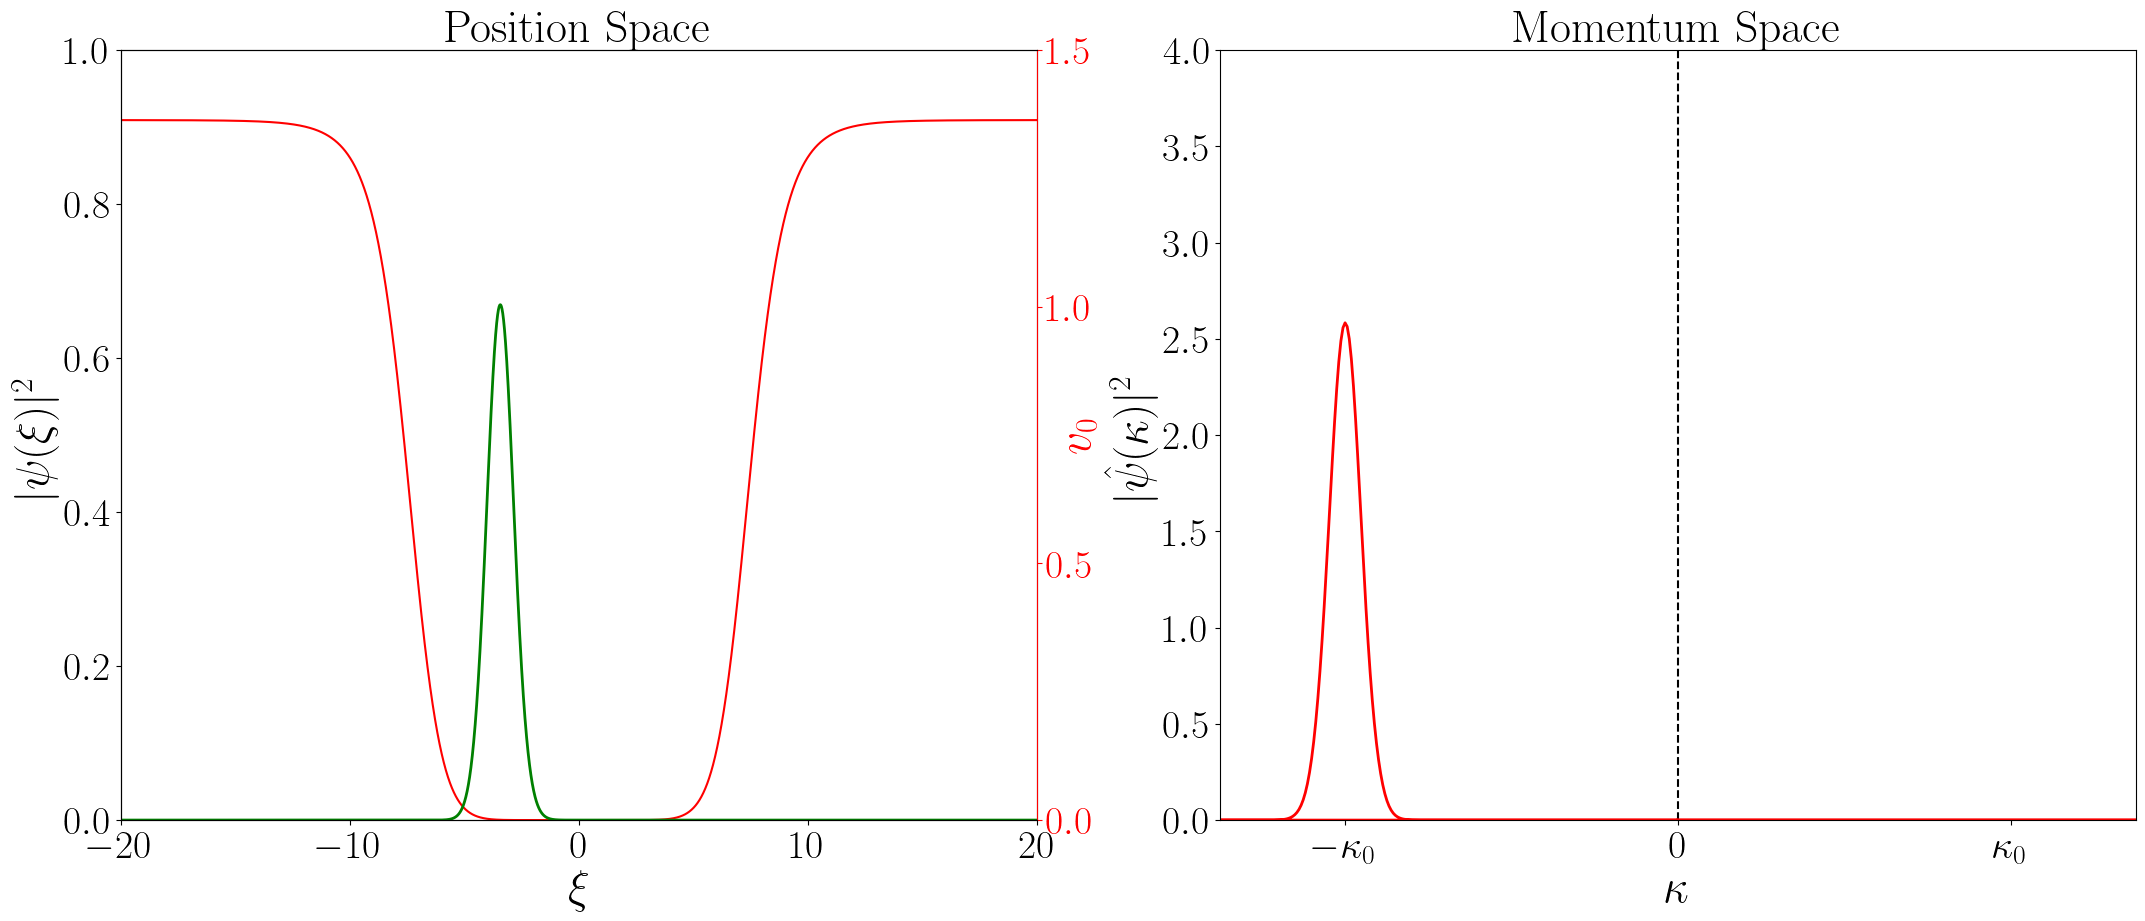

In [233]:
from matplotlib.animation import FuncAnimation 
from numpy.fft import fftshift
from matplotlib import rcParams


# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font


##################################################################################################################### PARÁMETROS ANIMACIÓN 

t_max = 9.5
t_steps = int((t_max) / dt)

print("T_STEPS = ", t_steps)

num_frames = 200
steps_per_frame = t_steps // num_frames
 
 
##################################################################################################################### MEDICIONES

t_start = 0 # EMPIEZAN LAS MEDIDAS

t_final = t_max # ACABAN LAS MEDIDAS

num_mediciones = 225000 # NUMERO DE MEDIDAS
num_mediciones = 1

if num_mediciones == 1:

    momentos_de_medicion = [t_max]  # One measurement at t_max

else:

    momentos_de_medicion = np.linspace(t_final / num_mediciones+t_start, t_final, num_mediciones)



indice_medicion = 0 # CONTANDO MEDIDAS


##################################################################################################################### INICIALIZANDO

psi = psi0.copy()

psiref = psi0.copy()

psi_evolution = []

psi_evolution_mom = []

probs = []

kinetic_energies = []

potential_energies = []

k = np.fft.fftfreq(N, d=dx)*2*np.pi

psi_k = psi_en_momentos(psi,k)

psi_k1 = psi_en_momentos(psiref, k)

psi_k_star = psi_en_momentos(psi0_star,k)

p = 1


##################################################################################################################### CONTROL LAYOUT ANIMACIÓN

fig, (ax_pos, ax_mom) = plt.subplots(1, 2, figsize=(26, 10))

######### POSICIONES

ax_pos.set_ylim(0,1)  # EJE Y
ax_pos.set_xlim (-20,20) # EJE X

######### LOG POSICIONES 




######### MOMENTOS

ax_mom.set_ylim (0,4)    # EJE Y
ax_mom.set_xlim(-kappa_0-7.5, kappa_0+7.5) # EJE X

##################################################################################################################### POTENCIAL

ax_pos.plot(xi, v*(1/2.2), color='r', linestyle='-',alpha = 1 )


##################################################################################################################### LINEAS DE REFERENCIA
# ax_mom.plot(k, np.abs(psi_k)**2, color= 'k', linestyle= '--', alpha = 1,) # DIST MOMENTOS INICIAL

# ax_mom.plot(k, np.abs(psi_k_star)**2, color= 'k', linestyle= '--', alpha = 1, label = r"Final $|\hat{\psi}(\kappa)|$ in absence of measurements") # DIST MOMENTOS FINAL SIN MEDIDAS

# ax_pos.axvline(x=b, color='k', linestyle='--', alpha=0.33)

# ax_pos.axvline(x=-b, color='k', linestyle='--', alpha=0.33)

# ax_pos.axvline(x=-3*b, color='k', linestyle='--', alpha=0.33)

# ax_pos.axvline(x=3*b, color='k', linestyle='--', alpha=0.33)

# ax_pos.axvline(x=5*b, color='k', linestyle='--', alpha=0.33)

# ax_pos.axvline(x=-5*b, color='k', linestyle='--', alpha=0.33)

# ax_mom.axvline(x=kappa_0, color='k', linestyle='--', alpha=0.33)

ax_mom.axvline(x=kmin, color='k', linestyle='--', alpha=1)
ax_pos.set_title(rf'Position Space', fontsize = 33)
ax_mom.set_title(f'Momentum Space', fontsize = 33)
# ax_mom.axvline(x=kmax, color='k', linestyle='--', alpha=0.33)


##################################################################################################################### LINEAS 

line_pos, = ax_pos.plot(xi, np.abs(psi)**2 , color='green', alpha = 1, linewidth = 2)

line_mom, = ax_mom.plot(k, np.abs(psi_k)**2, color='red', alpha = 1, linewidth = 2,  label = r"$|\hat{\psi}(\kappa)|$ with measurements")



line_pos1, = ax_pos.plot(xi, np.abs(psiref)**2, color='k', linestyle = '--', alpha = 0) 


line_mom1, = ax_mom.plot(k, np.abs(psi_k1)**2, color='red', alpha = 0)
##################################################################################################################### UPDATER

def update(frame):

    global psi, indice_medicion, p, psiref, psi_k, psi_evolution, kinetic_energies, potential_energies, psi_evolution_mom
    
    current_time = frame * steps_per_frame * dt  

    if frame == 0:
        print("Initializing frame 0")
        return line_pos, line_mom, line_pos1, line_mom1

    # print(current_time)

    psi_evolution.append((current_time, np.abs(psi)**2))

    psi_evolution_mom.append((current_time, np.abs(fftshift(psi_k))**2))

    kinetic_energies.append((current_time, kinetic_energy(psi,xi)/p))

    potential_energies.append ((current_time, potential_energy(psi,xi)/p))

    for _ in range(steps_per_frame):  

        psi = spsolve(A, B @ psi)
        psiref = spsolve(C, D @ psiref)

        current_time = current_time + dt 

        print("t = ", current_time)

    
        if indice_medicion < len(momentos_de_medicion) and current_time >= momentos_de_medicion[indice_medicion]:

            print("t = ", current_time)

            p = p* calculate_positive_kappa_probability(psi, xi, kmax, kmin)

            print("P = ", p) 

            psi = (np.sqrt(p))*perform_momentum_measurement(psi, xi, N, kmax, kmin)

            indice_medicion += 1  

            print("Medida num = ", indice_medicion)

    # Actualizar la densidad de probabilidad en espacio de posiciones




    line_pos.set_ydata(np.abs(psi)**2)
    line_pos1.set_ydata(np.abs(psiref)**2)

    psi_k = psi_en_momentos(psi, k)
    psi_k1 = psi_en_momentos(psiref, k)
    line_mom.set_ydata(np.abs(psi_k)**2)
    line_mom1.set_ydata(np.abs(psi_k1)**2)

    # Calcular psi en el espacio de momentos y actualizar gráfica

    
    return line_pos, line_mom, line_pos1, line_mom1



# Eje para la barrera
ax2 = ax_pos.twinx()  
ax2.set_ylim(0, 1.5)  # Límite = max barrera pot
ax2.set_ylabel(r'$v_0$',color='r',size = 33, labelpad = -25)
ax2.tick_params(axis='y', colors='red')  
ax2.spines['right'].set_color('red') 

ax_pos.tick_params(axis='both', labelsize=28.5)  # Apply to the primary axis
ax_mom.tick_params(axis='both', labelsize=28.5)  # Apply to the primary axis
ax2.tick_params(axis='y', labelsize=28.5)  # Apply to the secondary axis
ax2.set_yticks([0, 0.5, 1, 1.5])

ax_pos.set_xlabel(r'$\xi$', fontsize=33)
ax_mom.set_xlabel(r'$\kappa$', fontsize=33)

ax_pos.set_ylabel(r'$|\psi(\xi)|^2$', size=33)
ax_mom.set_ylabel(r'$|\hat{\psi}(\kappa)|^2$', size=33)

# ax_mom.axvspan(0, -50, color="grey",hatch="//", alpha=0.25, label="Zeno Subspace")

# ax_mom.text(15, 3.75, r"Zeno Subspace", 
#          fontsize=25, color="black", ha="center", bbox=dict(facecolor="white", alpha=0.8))

ax_mom.set_xticks([-kappa_0,0, kappa_0], [r"$-\kappa_0$", 0, r"$\kappa_0$"])

# ax_mom.text(-19, 2.75, "Final State", fontsize=16, color="black", ha="center")
# ax_mom.text(-19, 2.65, "in Absence of Measurements", fontsize=16, color="black", ha="center")




##################################################################################################################### ANIMACIÓN

ani = FuncAnimation(fig, update, frames=num_frames, blit=True)

ani.save('transloc_1.mp4', writer='ffmpeg', fps=60)


In [234]:
# Convertir la lista de tuplas en una matriz (n_x, n_t)
density_matrix = np.array([density_t for _, density_t in psi_evolution]).T

# Extraer los tiempos y las posiciones
times = [t for t, _ in psi_evolution]  # Extraer los tiempos de la lista de tuplas

T = []

V = []

times = []

for i in range (len(kinetic_energies)):
    T.append(kinetic_energies [i][1])
    times.append(kinetic_energies[i][0])

for i in range (len(potential_energies)):
    V.append(potential_energies [i][1])

print(len(T))


positions= xi


density_matrix_mom = np.array([density_t for _, density_t in psi_evolution_mom]).T
times_mom = [t for t, _ in psi_evolution_mom]  
k= np.fft.fftfreq(N, d=dx)*2*np.pi
k  = fftshift(k)



199


In [235]:
np.save ('density_matrix_b_0.npy', density_matrix)

In [236]:
density_matrix_1 = np.load ("density_matrix_b_1.npy")
density_matrix_25 = np.load ("density_matrix_b_2.5.npy")
density_matrix_0 = np.load ("density_matrix_b_0.npy")

Diferencia de Centros1 =  9.004430174867792
Diferencia de Centros25 =  10.939943484483212
2.6790000000000003


<function matplotlib.pyplot.show(close=None, block=None)>

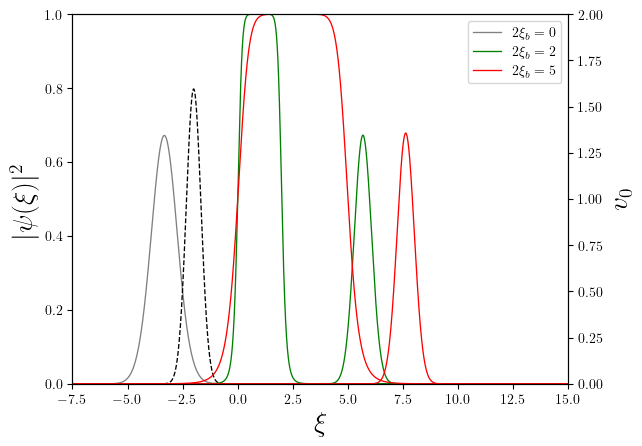

In [237]:
fig, ax = plt.subplots()

ax.plot (xi, density_matrix_0.T [-1], color = 'grey', linestyle = '-', linewidth = 0.95, label=r'$2\xi_b = 0$')
psi2 = density_matrix_0.T [-1]
centro0 = np.sum(xi * psi2) / np.sum(psi2)

ax.plot (xi, density_matrix_1.T [0], color = 'k', linestyle = '--', linewidth = 0.95)
b = 1
v = v_0 * ( 1 / (1 + np.abs((xi-b) / b)**alpha_param)) 

plt.plot (xi, v/v_0, color = 'green', linestyle = '-', linewidth = 0.95)
plt.plot (xi, density_matrix_1.T [-1], color = 'green', linestyle = '-', linewidth = 0.95, label=r'$2\xi_b = 2$')
psi2 = density_matrix_1.T [-1]
centro1 = np.sum(xi * psi2) / np.sum(psi2)

b = 2.5
v = v_0 * ( 1 / (1 + np.abs((xi-b) / b)**alpha_param)) 
ax.plot (xi, v/v_0, color = 'red', linestyle = '-', linewidth = 0.95)
plt.plot (xi, density_matrix_25.T [-1], color = 'red', linestyle = '-', linewidth = 0.95, label=r'$2\xi_b = 5$')

psi2 = density_matrix_25.T [-1]
centro25 = np.sum(xi * psi2) / np.sum(psi2)

print("Diferencia de Centros1 = ", (centro1 - centro0))
print("Diferencia de Centros25 = ", (centro25 - centro0))



# Eje para la barrera
ax2 = ax.twinx()  
ax2.set_ylim(0, 2)  # Límite = max barrera pot
ax2.set_ylabel(r'$v_0$',color='k',size = 20)
ax2.tick_params(axis='y', colors='k')  



print(times[-143])
ax.set_xlim (-7.5,15)
ax.set_ylim (0,1)
# plt.grid (True)
ax.set_xlabel(r"$\xi$", fontsize=20)
ax.set_ylabel(r"$|\psi(\xi)|^2$", fontsize=20)
ax.legend()
plt.show

In [238]:

def calcular_centros_y_fwhms(matriz_psi2, x):
    
    # Inicializar arrays para los resultados
    T = matriz_psi2.shape[1]  # Número de columnas (tiempos)
    centros = np.zeros(T)
    fwhms = np.zeros(T)

    # Iterar por cada columna (cada tiempo t)
    for i in range(T):  # Itera por columnas (tiempos t)
        psi2 = matriz_psi2[:, i]  # Densidad de probabilidad en el tiempo t (columna i)

        # Centro como promedio ponderado de las posiciones x
        centro = np.sum(x * psi2) / np.sum(psi2)
        centros[i] = centro
        
        # FWHM
        max_val = np.max(psi2)
        half_max = max_val / 2
        indices = np.where(psi2 >= half_max)[0]  # Índices donde |psi|² >= mitad del máximo
        
        # Calcular FWHM
        if len(indices) >= 2:
            fwhm = x[indices[-1]] - x[indices[0]]
        else:
            fwhm = 0.0  # FWHM no definido si no hay suficientes puntos
        fwhms[i] = fwhm

    return centros, fwhms

def calcular_centros_y_fwhms(matriz_psi2, x):
    
    # Inicializar arrays para los resultados
    T = matriz_psi2.shape[1]  # Número de columnas (tiempos)
    centros = np.zeros(T)
    centros2 = np.zeros(T)
    fwhms = np.zeros(T)

    # Iterar por cada columna (cada tiempo t)
    for i in range(T):  # Itera por columnas (tiempos t)
        psi2 = matriz_psi2[:, i]  # Densidad de probabilidad en el tiempo t (columna i)

        # Centro como promedio ponderado de las posiciones x
        # dx = np.diff(x)  # Assuming x is sorted
        # centro = np.sum((x[:-1]) * psi2[:-1] * dx) / np.sum(psi2[:-1] * dx)
        centro = np.sum(x * psi2) / np.sum(psi2)
        centros[i] = centro
        
        # FWHM
    for i in range(T):  # Itera por columnas (tiempos t)
        psi2 = matriz_psi2[:, i]  # Densidad de probabilidad en el tiempo t (columna i)

        # Centro como promedio ponderado de las posiciones x
        centro2 = np.sum((x)**2 * psi2) / np.sum(psi2)
        # centro2 = np.sum((x[:-1]**2) * psi2[:-1] * dx) / np.sum(psi2[:-1] * dx)
        centros2[i] = centro2
    
    for i in range(T):
        # fwhm = np.sqrt (centros2[i]-(centros[i]**2))
        fwhm = np.sqrt (centros2[i]-centros[i]**2)
        fwhms[i] = fwhm

    return centros, fwhms



def potential_energy2(psi2, xi):

    potential_energy = np.abs((kappa_0) * trapezoid(v* psi2, xi))
    
    return potential_energy

def encontrar_puntos_cambio(abcisas, valores_funcion, umbral_cambio=0.1):
    # Calcular la derivada primera (pendiente) de la función
    derivada1 = np.gradient(valores_funcion, abcisas)
    
    # Calcular el cambio en la pendiente (derivada de la primera derivada)
    cambio_pendiente = np.gradient(derivada1, abcisas)
    
    # Buscar los puntos donde el cambio en la pendiente supera un umbral
    puntos_cambio = []
    for i in range(1, len(cambio_pendiente)):
        if abs(cambio_pendiente[i]) > umbral_cambio:
            # Guardar el punto y el valor de la función en ese punto de cambio
            puntos_cambio.append((abcisas[i], valores_funcion[i]))
    
    return puntos_cambio


def find_f_of_a(x, fx, a):

    # Sort x and fx based on x to ensure proper interpolation
    sorted_pairs = sorted(zip(x, fx))
    x_sorted, fx_sorted = zip(*sorted_pairs)

    # Perform linear interpolation
    for i in range(len(x_sorted) - 1):
        if x_sorted[i] <= a <= x_sorted[i + 1]:
            # Linear interpolation formula
            return fx_sorted[i] + (fx_sorted[i + 1] - fx_sorted[i]) * ((a - x_sorted[i]) / (x_sorted[i + 1] - x_sorted[i]))


IndexError: list index out of range

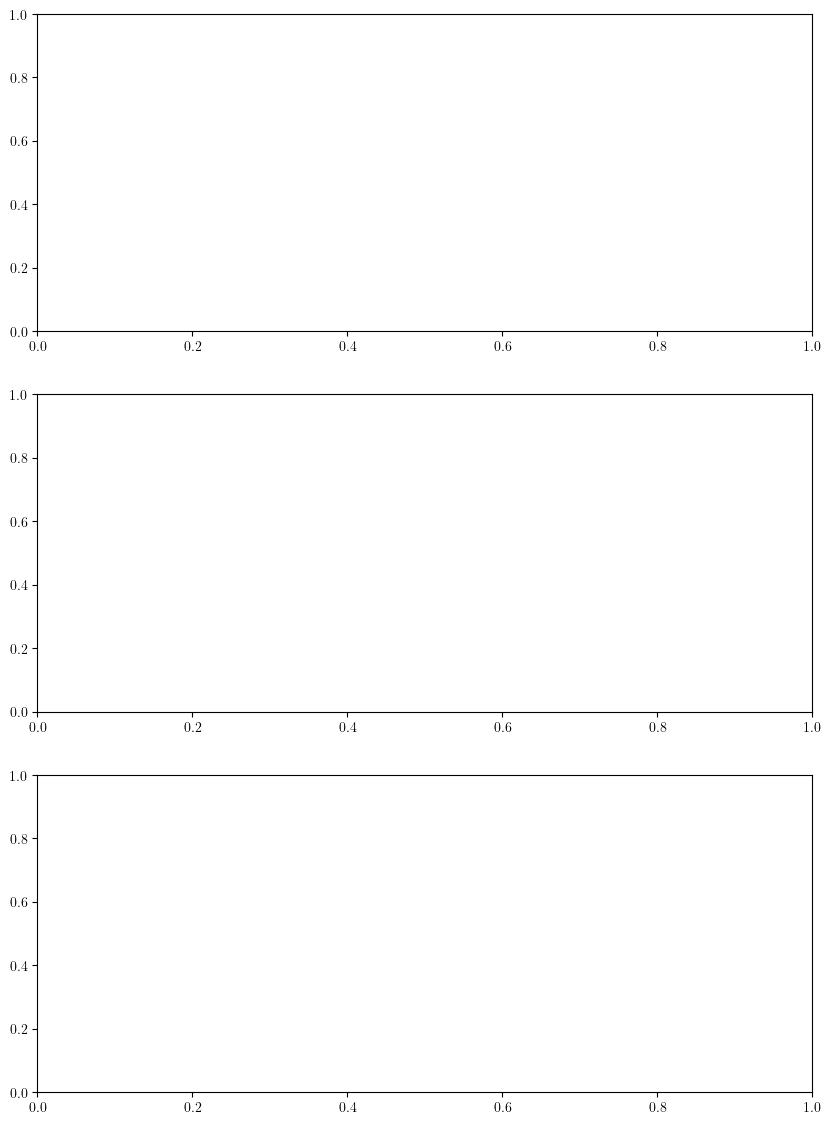

In [239]:

from matplotlib import rcParams

# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font




centros, fwhms = calcular_centros_y_fwhms(density_matrix, xi)

times = np.array (times) 


fig, axs = plt.subplots(3, 1, figsize=(10, 14))

umbral_cambio = 12

t1 = encontrar_puntos_cambio(times, centros, umbral_cambio) [0][0]
t2 = encontrar_puntos_cambio(times, centros, umbral_cambio) [-1][0]

plt.title 
# Subgráfico 1: Centro en función del tiempo
# Subgráfico 2: FWHM en función del tiempo
axs[0].plot(times, centros, color='green')
# axs[0].axhline(y=2*b, color='k', linestyle='--', label='y = 2b')  # Línea en y = 2b
axs[0].set_xlabel(r'$\tau$', fontsize = 20)
axs[0].axvline(x=t2, color='k', linestyle='--', label=f't = {t2}')  # Línea vertical en t2
axs[0].axvline(x=t1, color='k', linestyle='--', label=f't = {t1}')  # Línea vertical en t1
axs[0].set_ylabel(r'$\left\langle\xi\right\rangle$', fontsize = 20)
axs[0].set_xlim(0,t_max)
# axs[0].grid(True)


# Subgráfico 2: Energies
T = np.array (T)
V = np.array (V)

V1 = find_f_of_a(times, V, t1)
V2 = find_f_of_a(times, V, t2)
axs[1].plot(times, V, label='Potential Energy', color='blue')
axs[1].plot(times, T, label='Kinetic Energy', color='red')
axs[1].plot(times, T+V, label='Total Energy', color='green')
axs[1].axhline(y=T[0]+V[0], color='k', linestyle='--', label= 'Initial Total Energy') 
axs[1].set_xlabel(r'$\tau$', fontsize = 20)
axs[1].axvline(x=t2, color='k', linestyle='--')  # Línea vertical en t2
# axs[1].axhline(y=V1, color='k', linestyle='--') 
axs[1].axhline(y=(V1+V2)/2, color='k', linestyle='--') 
axs[1].axvline(x=t1, color='k', linestyle='--')  # Línea vertical en t1
axs[1].set_ylabel('Energy', fontsize = 20)
axs[1].set_xlim(0,t_max)
axs[1].legend()



# Subgráfico 3: Energía en función del tiempo


x1 = find_f_of_a(times, centros, t1)
x2 = find_f_of_a(times, centros, t2)

V1 = find_f_of_a(xi, v, x1)
V2 = find_f_of_a(xi, v, x2)




axs[2].plot(xi, v, color='k', linestyle='-',alpha = 1 )
axs[2].axvline(x=x1, color='k', linestyle='--', label=f'x = {x1}')  # Línea vertical en t2
axs[2].axvline(x=x2, color='k', linestyle='--', label=f'x = {x2}')  # Línea vertical en t2
axs[2].axhline(y=(V1+V2)/2, color='k', linestyle='--') 
axs[2].set_xlabel(r'$\xi$', fontsize = 20)
axs[2].set_ylabel(r'$v (\xi)$', fontsize = 20)
axs[2].set_xlim(-10,10)
axs[2].set_ylim(0,v_0*1.1)




# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar todos los subgráficos
plt.show()


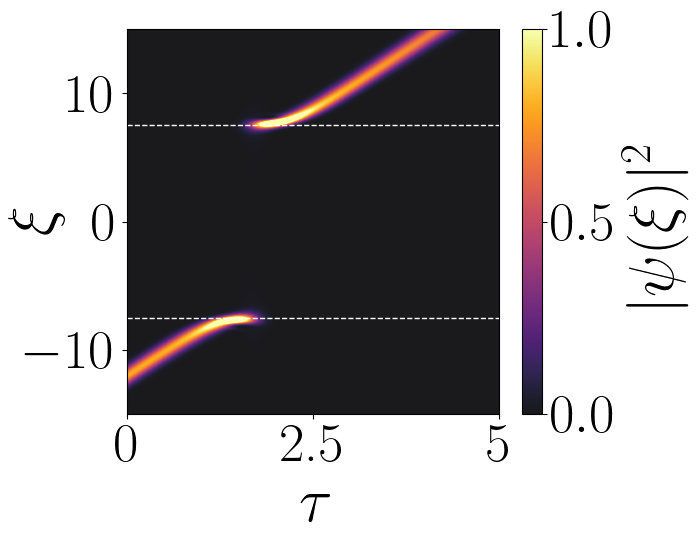

In [ ]:
from matplotlib import rcParams


# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font

plt.figure(figsize=(6, 5))



# Mapa de calor para la barrera alta (colormap 'inferno' y rango consistente)


im = plt.imshow(density_matrix, aspect='auto', cmap='inferno', origin='lower', 
                extent=[times[0], times[-1], positions[0], positions[-1]], alpha = 0.9, vmin=0, vmax=1)






# Líneas horizontales
plt.axhline(y=7.5, color='white', linestyle='--', linewidth=1)
plt.axhline(y=-7.5, color='white', linestyle='--', linewidth=1)

# Añadir una barra de color para el mapa
cbar = plt.colorbar(im, ticks=[0.0, 0.5, 1.0])
cbar.set_label(r"$|\psi(\xi)|^2$", fontsize=45)

# Etiquetas de los ejes
plt.xlabel(r"$\tau$", fontsize=45)
plt.ylabel(r"$\xi$", fontsize=45, labelpad = -30)
plt.ylim(-15,15)


plt.tick_params(axis='both', labelsize=40)
plt.xticks([times[0], times[int(len(times)/2)], times[-1]], ["0", "2.5", "5"])
cbar.ax.tick_params(labelsize=40) 

# Mostrar el gráfico
plt.show()

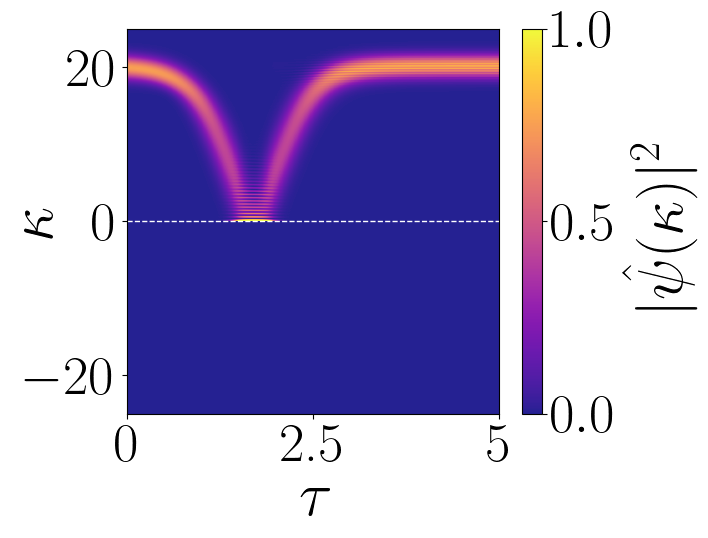

In [ ]:
from matplotlib import rcParams


# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font

plt.figure(figsize=(6, 5))


# Mapa de calor para la barrera alta (colormap 'inferno' y rango consistente)



for i in range (len(times)):
    density_matrix_mom.T [i] = density_matrix_mom.T [i] / np.sqrt(trapezoid(np.abs(density_matrix_mom.T [i])**2, k))


im = plt.imshow(density_matrix_mom, aspect='auto', cmap='plasma', origin='lower', 
                extent=[times_mom[0], times_mom[-1], k[0], k[-1]], alpha = 0.9, vmin=0, vmax=1)






# # Líneas horizontales
plt.axhline(y=kmin, color='white', linestyle='--', linewidth=1)
# plt.axhline(y=kappa_0, color='white', linestyle='--', linewidth=1)
# plt.axhline(y=-b, color='white', linestyle='--', linewidth=0.5)

# Añadir una barra de color para el mapa
cbar = plt.colorbar(im, ticks=[0.0, 0.5, 1.0])
cbar.set_label(r"$|\hat{\psi}(\kappa)|^2$", fontsize=45)

# Etiquetas de los ejes
plt.xlabel(r"$\tau$", fontsize=26)
plt.ylabel(r"$\kappa$", fontsize=26)
plt.xlim (times[0], times[-1])

plt.ylim(-25,25)

# Etiquetas de los ejes
plt.xlabel(r"$\tau$", fontsize=45, labelpad = 0)
plt.ylabel(r"$\kappa$", fontsize=45, labelpad = -30)
plt.tick_params(axis='both', labelsize=40) 
plt.xticks([times[0], times[int(len(times)/2)], times[-1]], ["0", "2.5", "5"])
# plt.yticks([-20, 0, 20])

cbar.ax.tick_params(labelsize=40) 

# Mostrar el gráfico
plt.show()

4.9612


<function matplotlib.pyplot.show(close=None, block=None)>

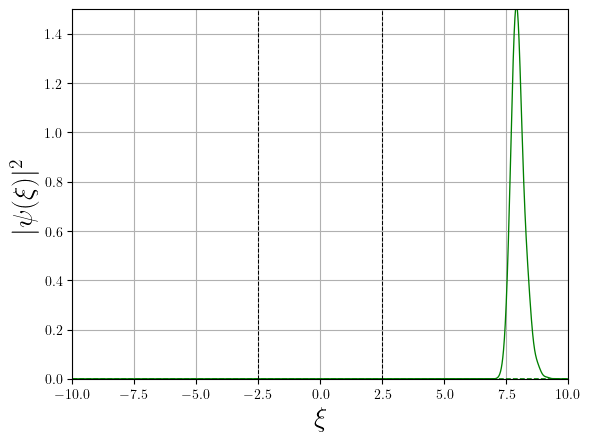

In [ ]:
plt.plot (xi, density_matrix.T [-170], color = 'Green', linewidth = 0.95)
plt.plot (xi, density_matrix.T [0], color = 'green', linestyle = '--', linewidth = 0.95)
plt.xlim (-10,10)
print(times[-143])
plt.ylim (0,1.5)
plt.grid (True)
plt.axvline(x = -b, color = 'k', linestyle = "--", linewidth = 0.75)
plt.axvline(x = b, color = 'k', linestyle = "--", linewidth = 0.75)
plt.xlabel(r"$\xi$", fontsize=20)
plt.ylabel(r"$|\psi(\xi)|^2$", fontsize=20)
plt.show

4.74


<function matplotlib.pyplot.show(close=None, block=None)>

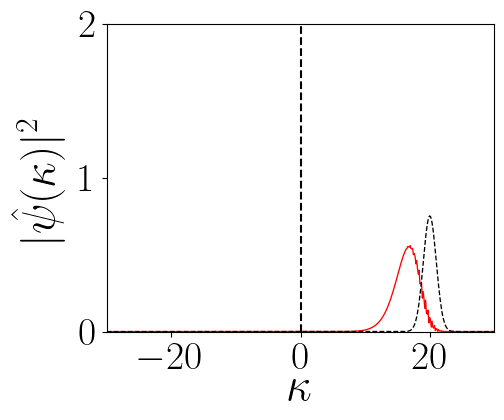

In [ ]:
plt.figure(figsize=(5, 4))

for i in range (len(times)):
    density_matrix_mom.T [i] = density_matrix_mom.T [i] / np.sqrt(trapezoid(np.abs(density_matrix_mom.T [i])**2, k))

plt.plot (k, density_matrix_mom.T [-150], color = 'r', linewidth = 0.95)
print(times_mom[-150])
plt.plot (k, density_matrix_mom.T [0], color = 'k', linestyle = '--', linewidth = 0.95)
plt.ylim (0,2)
plt.xlim (-30,30)
# plt.grid (True)
# plt.xticks ([-10,0,10,20,30])
plt.axvline(x = kmin, color = 'k', linestyle = "--")
plt.xlabel(r"$\kappa$", fontsize=33, labelpad = -5)
plt.ylabel(r"$|\hat{\psi}(\kappa)|^2$", fontsize=33, labelpad = 10)
plt.tick_params(axis='both', labelsize=28.5)  # Apply to the primary axis
plt.show

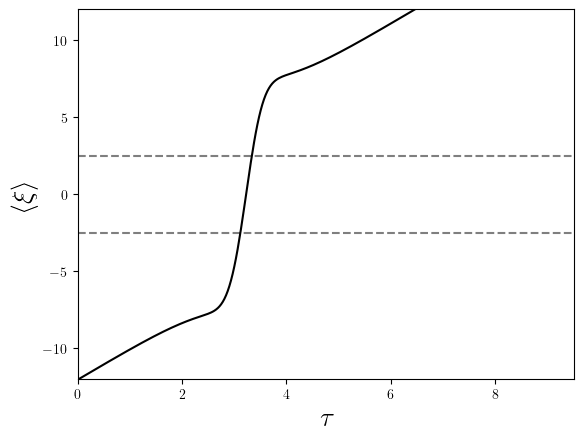

In [ ]:

# plt.plot(times, centros22, color='green', label=r'$\kappa_{min}=22$')
plt.plot(times, centros, color='k', label = r"$\kappa_{min}=22$")
plt.axhline(y=-b, color='k', linestyle='--', alpha = 0.5)
plt.axhline(y=b, color='k', linestyle='--', alpha = 0.5)
plt.xlabel(r'$\tau$', fontsize = 20)
plt.ylabel(r'$\left\langle\xi\right\rangle$', fontsize = 20)
plt.xlim(0,t_max)
plt.ylim(-12,12)
# plt.legend()
plt.show()

In [ ]:
centros22 = np.load ('centros_kappa22.npy')
centros8 = np.load ('centros_kappa8.npy')
centros0 = np.load ('centros_kappa0.npy')
centros_8 = np.load ('centros_kappa-8.npy')
centros_18 = np.load ('centros_kappa-18.npy')

T22 = np.load ('T_kappa22.npy')
T8 = np.load ('T_kappa8.npy')
T0 = np.load ('T_kappa0.npy')
T_8 = np.load ('T_kappa-8.npy')
T_18 = np.load ('T_kappa-18.npy')

V22 = np.load ('V_kappa22.npy')
V8 = np.load ('V_kappa8.npy')
V0 = np.load ('V_kappa0.npy')
V_8 = np.load ('V_kappa-8.npy')
V_18 = np.load ('V_kappa-18.npy')

IndexError: list index out of range

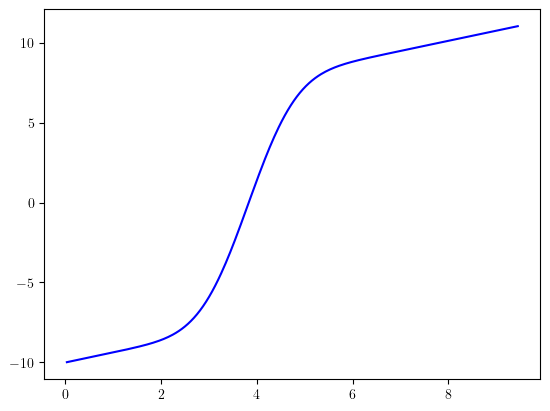

In [ ]:

# plt.plot(times, centros22, color='green', label=r'$\kappa_{min}=22$')
plt.plot(times, centros22, color='blue', label = r"$\kappa_{min}=22$")
t1 = encontrar_puntos_cambio(times, centros22, umbral_cambio) [0][0]
t2 = encontrar_puntos_cambio(times, centros22, umbral_cambio) [-1][0]
# plt.axvline(x=t2, color='k', linestyle='--',alpha = 0.5)  # Línea vertical en t2
# plt.axvline(x=t1, color='k', linestyle='--', alpha = 0.5)  # Línea vertical en t1

t1 = encontrar_puntos_cambio(times, centros8, umbral_cambio) [0][0]
t2 = encontrar_puntos_cambio(times, centros8, umbral_cambio) [-1][0]
# plt.axvline(x=t2, color='darkorange', linestyle='--', alpha = 0.5)  # Línea vertical en t2
# plt.axvline(x=t1, color='darkorange', linestyle='--',alpha = 0.5)  # Línea vertical en t1
plt.plot(times, centros8, color='red', label=r'$\kappa_{min}=8$')

t1 = encontrar_puntos_cambio(times, centros0, umbral_cambio) [0][0]
t2 = encontrar_puntos_cambio(times, centros0, umbral_cambio) [-1][0]
# plt.axvline(x=t2, color='darkorange', linestyle='--', alpha = 0.5)  # Línea vertical en t2
# plt.axvline(x=t1, color='darkorange', linestyle='--',alpha = 0.5)  # Línea vertical en t1
plt.plot(times, centros0, color='green', label=r'$\kappa_{min}=0$')

# t1 = encontrar_puntos_cambio(times, centros_8, umbral_cambio) [0][0]
# t2 = encontrar_puntos_cambio(times, centros_8, umbral_cambio) [-1][0]
# # plt.axvline(x=t2, color='darkorange', linestyle='--', alpha = 0.5)  # Línea vertical en t2
# # plt.axvline(x=t1, color='darkorange', linestyle='--',alpha = 0.5)  # Línea vertical en t1
# # plt.plot(times, centros0, color='orange', label=r'$\kappa_{min}=0$')
# plt.plot(times, centros_8, color='darkorange', label = r"$\kappa_{min}=-8$")

# t1 = encontrar_puntos_cambio(times, centros_18, umbral_cambio) [0][0]
# t2 = encontrar_puntos_cambio(times, centros_18, umbral_cambio) [-1][0]
# # plt.axvline(x=t2, color='darkorange', linestyle='--', alpha = 0.5)  # Línea vertical en t2
# # plt.axvline(x=t1, color='darkorange', linestyle='--',alpha = 0.5)  # Línea vertical en t1
# # plt.plot(times, centros0, color='orange', label=r'$\kappa_{min}=0$')
# plt.plot(times, centros_18, color='darkorange', label = r"$\kappa_{min}=-18$")


# plt.plot(times, centros_18, color='grey', label=r'$\kappa_{min}=-18$')
plt.xlabel(r'$\tau$', fontsize = 20)
plt.ylabel(r'$\left\langle\xi\right\rangle$', fontsize = 20)
plt.xlim(0,t_max)
plt.ylim(-10,12)
plt.grid (True)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

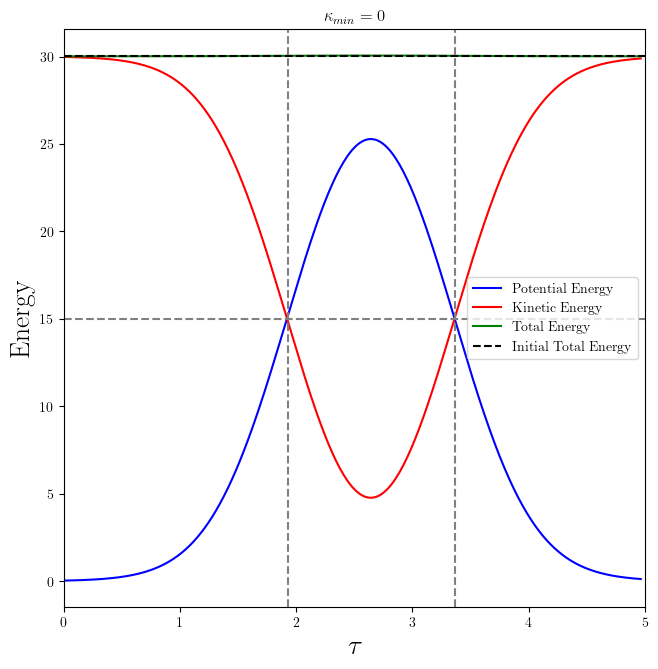

In [ ]:
T22 = np.array (T22)
V22 = np.array (V22)

T8 = np.array (T8)
V8 = np.array (V8)

T0 = np.array (T0)
V0 = np.array (V0)

T_8 = np.array (T_8)
V_8 = np.array (V_8)

T_18 = np.array (T_18)
V_18 = np.array (V_18)

# plt.plot(times, V_18, color='grey')
# plt.plot(times, T_18, color='grey')
# plt.plot(times, T_18+V_18)
# plt.axhline(y=T_18[0]+V_18[0], color='k', linestyle='--', label= 'Initial Total Energy') 

# plt.plot(times, V_8, color='blue')
# plt.plot(times, T_8, color='blue')
# plt.plot(times, T_8+V_8)

# plt.plot(times, V0, color='orange')
# plt.plot(times, T0, color='orange')
# plt.plot(times, T0+V0)

# plt.plot(times, V8, color='red')
# plt.plot(times, T8, color='red')
# plt.plot(times, T8+V8)

T = np.array (T0)
V = np.array (V0)

t1 = encontrar_puntos_cambio(times, centros0, umbral_cambio) [0][0]
t2 = encontrar_puntos_cambio(times, centros0, umbral_cambio) [-1][0]

V1 = find_f_of_a(times, V, t1)
V2 = find_f_of_a(times, V, t2)

plt.figure(figsize=(7.5,7.5))
plt.title(r'$\kappa_{min} = 0$')
plt.plot(times, V, label='Potential Energy', color='blue')
plt.plot(times, T, label='Kinetic Energy', color='red')
plt.plot(times, T+V, label='Total Energy', color='green')
plt.axhline(y=T[0]+V[0], color='k', linestyle='--', label= 'Initial Total Energy') 
plt.xlabel(r'$\tau$', fontsize = 20)
plt.axvline(x=t2, color='grey', linestyle='--', alpha = 1)  # Línea vertical en t2
# axs[1].axhline(y=V1, color='k', linestyle='--') 
plt.axhline(y=(V1+V2)/2, color='grey', linestyle='--') 
plt.axvline(x=t1, color='grey', linestyle='--', alpha=1 )  # Línea vertical en t1
plt.ylabel('Energy', fontsize = 20)
plt.xlim(0,t_max)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

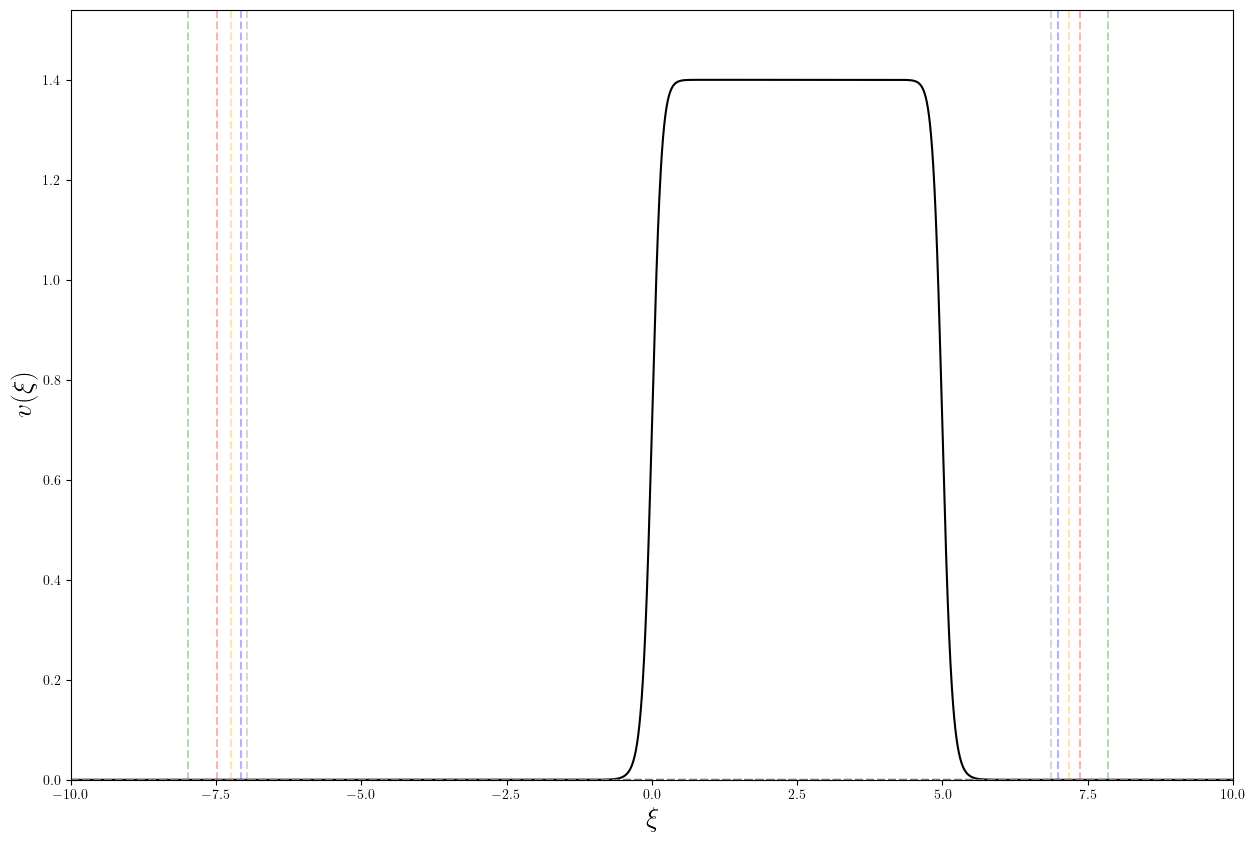

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(xi, v, color='k', linestyle='-',alpha = 1 )

t1 = encontrar_puntos_cambio(times, centros22, umbral_cambio) [0][0]
t2 = encontrar_puntos_cambio(times, centros22, umbral_cambio) [-1][0]

x1 = find_f_of_a(times, centros22, t1)
x2 = find_f_of_a(times, centros22, t2)

V1 = find_f_of_a(xi, v, x1)
V2 = find_f_of_a(xi, v, x2)


plt.axvline(x=x1, linestyle='--', label=f'x = {x1}', color = 'green', alpha = 0.3)  # Línea vertical en t2
plt.axvline(x=x2, linestyle='--', label=f'x = {x2}', color = 'green', alpha = 0.3)  # Línea vertical en t2
plt.axhline(y=(V1+V2)/2, color='green', linestyle='--') 



t1 = encontrar_puntos_cambio(times, centros8, umbral_cambio) [0][0]
t2 = encontrar_puntos_cambio(times, centros8, umbral_cambio) [-1][0]

x1 = find_f_of_a(times, centros8, t1)
x2 = find_f_of_a(times, centros8, t2)

V1 = find_f_of_a(xi, v, x1)
V2 = find_f_of_a(xi, v, x2)


plt.axvline(x=x1, color='red', linestyle='--', label=f'x = {x1}', alpha = 0.3)  # Línea vertical en t2
plt.axvline(x=x2, color='red', linestyle='--', label=f'x = {x2}', alpha = 0.3)  # Línea vertical en t2
plt.axhline(y=(V1+V2)/2, color='red', linestyle='--') 



t1 = encontrar_puntos_cambio(times, centros0, umbral_cambio) [0][0]
t2 = encontrar_puntos_cambio(times, centros0, umbral_cambio) [-1][0]

x1 = find_f_of_a(times, centros0, t1)
x2 = find_f_of_a(times, centros0, t2)

V1 = find_f_of_a(xi, v, x1)
V2 = find_f_of_a(xi, v, x2)


plt.axvline(x=x1, color='orange', linestyle='--', label=f'x = {x1}', alpha = 0.3)  # Línea vertical en t2
plt.axvline(x=x2, color='orange', linestyle='--', label=f'x = {x2}', alpha = 0.3)  # Línea vertical en t2
plt.axhline(y=(V1+V2)/2, color='orange', linestyle='--') 




t1 = encontrar_puntos_cambio(times, centros_8, umbral_cambio) [0][0]
t2 = encontrar_puntos_cambio(times, centros_8, umbral_cambio) [-1][0]

x1 = find_f_of_a(times, centros_8, t1)
x2 = find_f_of_a(times, centros_8, t2)

V1 = find_f_of_a(xi, v, x1)
V2 = find_f_of_a(xi, v, x2)


plt.axvline(x=x1, color='blue', linestyle='--', label=f'x = {x1}', alpha = 0.3)  # Línea vertical en t2
plt.axvline(x=x2, color='blue', linestyle='--', label=f'x = {x2}', alpha = 0.3)  # Línea vertical en t2
plt.axhline(y=(V1+V2)/2, color='blue', linestyle='--') 



t1 = encontrar_puntos_cambio(times, centros_18, umbral_cambio) [0][0]
t2 = encontrar_puntos_cambio(times, centros_18, umbral_cambio) [-1][0]

x1 = find_f_of_a(times, centros_18, t1)
x2 = find_f_of_a(times, centros_18, t2)

V1 = find_f_of_a(xi, v, x1)
V2 = find_f_of_a(xi, v, x2)


plt.axvline(x=x1, color='grey', linestyle='--', label=f'x = {x1}', alpha = 0.3)  # Línea vertical en t2
plt.axvline(x=x2, color='grey', linestyle='--', label=f'x = {x2}', alpha = 0.3)  # Línea vertical en t2
plt.axhline(y=(V1+V2)/2, color='grey', linestyle='--') 



plt.xlabel(r'$\xi$', fontsize = 20)
plt.ylabel(r'$v (\xi)$', fontsize = 20)
plt.xlim(-10,10)
plt.ylim(0,v_0*1.1)
plt.show